# ANALISIS SENTIMEN PELABELAN DENGAN MENGGUNAKAN METODE LEXICION BASED

# A. Instalasi Package

In [1]:
conda install -c conda-forge swifter

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install PySastrawi

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c intel scikit-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
conda install -c intel scikit-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# B. Pemanggilan Library

In [1]:
#-----------Library Tokenizing------------
import string 
import re #regex library
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

#-----------Library Stopword------------
from nltk.corpus import stopwords

#-----------Library Stemming------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

#-----------Library Visual------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#-----------Library Load Data Analisis------------
import pandas as pd 
import numpy as np

#--------------Library Klasifikasi Naive Bayes--------------------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# A. Load Data Analisis

In [2]:
TWEET_DATA = pd.read_csv("datatweet.csv", sep=",", encoding='ISO-8859-1')
pd.set_option('max_colwidth',1)

TWEET_DATA

,Waktu,Data
0,9/5/2021 0:31,"Selamat pagi , bisa saja mereka minum kopi , Mereka dengan sengaja memanfaatkan aplikasi peduli lindungi"
1,9/17/2021 12:48,Sosialisasi aplikasi Peduli Lindungi SATLANTAS POLRES PESISIR SELATAN #tmc polda metro
2,9/18/2021 1:44,"saya kan kemarin mendaftarkan orang tua saya vaksin di Peduli Lindungi, sekarang status nya seperti ini, terus langkah selanjutnya harus gimana ya?"
3,9/22/2021 5:43,aplikasi peduli lindungi soalnya ada kata melindungi kamu
4,9/17/2021 2:27,"Data Nomor Induk Kependudukan Tidak ditemukan di Peduli Lindungi, Hubungi Satu Data Vaksinasi di Pusat Telepon: Hot line Peduli Lindungi"
...,...,...
3185,9/17/2021 16:03,"Yuanita menambahkan, peserta vaksinasi harus mendaftar di elektronik vaksin yang tersedia di website, isi biodata dan mengisi formulir vaksin"
3186,9/21/2021 3:02,yuk kita pakai Peduli Lindungi (:
3187,9/18/2021 16:35,"Yuk segera unduh aplikasi peduli lindungi. Mulai tanggal 14 September 2021, masuk supermarket kini wajib menggunakan peduli lidungi"
3188,9/6/2021 5:50,"Yuk sobat, segera pasang atau unduh aplikasi peduli lindungi ya agar kita dapat selalu mencegah penyebaran covid"


# B. Proses Preprocessing

## 1. Case Folding

In [3]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
TWEET_DATA['Data'] = TWEET_DATA['Data'].str.lower()


print('Hasil Proses Case Folding :')

TWEET_DATA

Hasil Proses Case Folding :


,Waktu,Data
0,9/5/2021 0:31,"selamat pagi , bisa saja mereka minum kopi , mereka dengan sengaja memanfaatkan aplikasi peduli lindungi"
1,9/17/2021 12:48,sosialisasi aplikasi peduli lindungi satlantas polres pesisir selatan #tmc polda metro
2,9/18/2021 1:44,"saya kan kemarin mendaftarkan orang tua saya vaksin di peduli lindungi, sekarang status nya seperti ini, terus langkah selanjutnya harus gimana ya?"
3,9/22/2021 5:43,aplikasi peduli lindungi soalnya ada kata melindungi kamu
4,9/17/2021 2:27,"data nomor induk kependudukan tidak ditemukan di peduli lindungi, hubungi satu data vaksinasi di pusat telepon: hot line peduli lindungi"
...,...,...
3185,9/17/2021 16:03,"yuanita menambahkan, peserta vaksinasi harus mendaftar di elektronik vaksin yang tersedia di website, isi biodata dan mengisi formulir vaksin"
3186,9/21/2021 3:02,yuk kita pakai peduli lindungi (:
3187,9/18/2021 16:35,"yuk segera unduh aplikasi peduli lindungi. mulai tanggal 14 september 2021, masuk supermarket kini wajib menggunakan peduli lidungi"
3188,9/6/2021 5:50,"yuk sobat, segera pasang atau unduh aplikasi peduli lindungi ya agar kita dapat selalu mencegah penyebaran covid"


## 2. Tokenizing

In [6]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
TWEET_DATA['Data'] = TWEET_DATA['Data'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TWEET_DATA['Data'] = TWEET_DATA['Data'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TWEET_DATA['Data'] = TWEET_DATA['Data'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TWEET_DATA['Data'] = TWEET_DATA['Data'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TWEET_DATA['Data'] = TWEET_DATA['Data'].apply(remove_whitespace_multiple)

# remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TWEET_DATA['Data'] = TWEET_DATA['Data'].apply(remove_single_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

TWEET_DATA['Data_Tokens'] = TWEET_DATA['Data'].apply(word_tokenize_wrapper)

print('Hasil proses Tokenizing :') 
TWEET_DATA

Hasil proses Tokenizing :


,Waktu,Data,Data_Tokens
0,9/5/2021 0:31,selamat pagi bisa saja mereka minum kopi mereka dengan sengaja memanfaatkan aplikasi peduli lindungi,"[selamat, pagi, bisa, saja, mereka, minum, kopi, mereka, dengan, sengaja, memanfaatkan, aplikasi, peduli, lindungi]"
1,9/17/2021 12:48,sosialisasi aplikasi peduli lindungi satlantas polres pesisir selatan polda metro,"[sosialisasi, aplikasi, peduli, lindungi, satlantas, polres, pesisir, selatan, polda, metro]"
2,9/18/2021 1:44,saya kan kemarin mendaftarkan orang tua saya vaksin di peduli lindungi sekarang status nya seperti ini terus langkah selanjutnya harus gimana ya,"[saya, kan, kemarin, mendaftarkan, orang, tua, saya, vaksin, di, peduli, lindungi, sekarang, status, nya, seperti, ini, terus, langkah, selanjutnya, harus, gimana, ya]"
3,9/22/2021 5:43,aplikasi peduli lindungi soalnya ada kata melindungi kamu,"[aplikasi, peduli, lindungi, soalnya, ada, kata, melindungi, kamu]"
4,9/17/2021 2:27,data nomor induk kependudukan tidak ditemukan di peduli lindungi hubungi satu data vaksinasi di pusat telepon hot line peduli lindungi,"[data, nomor, induk, kependudukan, tidak, ditemukan, di, peduli, lindungi, hubungi, satu, data, vaksinasi, di, pusat, telepon, hot, line, peduli, lindungi]"
...,...,...,...
3185,9/17/2021 16:03,yuanita menambahkan peserta vaksinasi harus mendaftar di elektronik vaksin yang tersedia di website isi biodata dan mengisi formulir vaksin,"[yuanita, menambahkan, peserta, vaksinasi, harus, mendaftar, di, elektronik, vaksin, yang, tersedia, di, website, isi, biodata, dan, mengisi, formulir, vaksin]"
3186,9/21/2021 3:02,yuk kita pakai peduli lindungi,"[yuk, kita, pakai, peduli, lindungi]"
3187,9/18/2021 16:35,yuk segera unduh aplikasi peduli lindungi mulai tanggal september masuk supermarket kini wajib menggunakan peduli lidungi,"[yuk, segera, unduh, aplikasi, peduli, lindungi, mulai, tanggal, september, masuk, supermarket, kini, wajib, menggunakan, peduli, lidungi]"
3188,9/6/2021 5:50,yuk sobat segera pasang atau unduh aplikasi peduli lindungi ya agar kita dapat selalu mencegah penyebaran covid,"[yuk, sobat, segera, pasang, atau, unduh, aplikasi, peduli, lindungi, ya, agar, kita, dapat, selalu, mencegah, penyebaran, covid]"


## 3. Stopword Removal

In [7]:
from nltk.corpus import stopwords
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

In [8]:
# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TWEET_DATA['Data_Tokens_Stopwords'] = TWEET_DATA['Data_Tokens'].apply(stopwords_removal) 

print('Hasil proses Stopword Removal :') 
TWEET_DATA

Hasil proses Stopword Removal :


,Waktu,Data,Data_Tokens,Data_Tokens_Stopwords
0,9/5/2021 0:31,selamat pagi bisa saja mereka minum kopi mereka dengan sengaja memanfaatkan aplikasi peduli lindungi,"[selamat, pagi, bisa, saja, mereka, minum, kopi, mereka, dengan, sengaja, memanfaatkan, aplikasi, peduli, lindungi]","[selamat, pagi, minum, kopi, sengaja, memanfaatkan, aplikasi, peduli, lindungi]"
1,9/17/2021 12:48,sosialisasi aplikasi peduli lindungi satlantas polres pesisir selatan polda metro,"[sosialisasi, aplikasi, peduli, lindungi, satlantas, polres, pesisir, selatan, polda, metro]","[sosialisasi, aplikasi, peduli, lindungi, satlantas, polres, pesisir, selatan, polda, metro]"
2,9/18/2021 1:44,saya kan kemarin mendaftarkan orang tua saya vaksin di peduli lindungi sekarang status nya seperti ini terus langkah selanjutnya harus gimana ya,"[saya, kan, kemarin, mendaftarkan, orang, tua, saya, vaksin, di, peduli, lindungi, sekarang, status, nya, seperti, ini, terus, langkah, selanjutnya, harus, gimana, ya]","[kemarin, mendaftarkan, orang, tua, vaksin, peduli, lindungi, status, nya, langkah, gimana, ya]"
3,9/22/2021 5:43,aplikasi peduli lindungi soalnya ada kata melindungi kamu,"[aplikasi, peduli, lindungi, soalnya, ada, kata, melindungi, kamu]","[aplikasi, peduli, lindungi, melindungi]"
4,9/17/2021 2:27,data nomor induk kependudukan tidak ditemukan di peduli lindungi hubungi satu data vaksinasi di pusat telepon hot line peduli lindungi,"[data, nomor, induk, kependudukan, tidak, ditemukan, di, peduli, lindungi, hubungi, satu, data, vaksinasi, di, pusat, telepon, hot, line, peduli, lindungi]","[data, nomor, induk, kependudukan, ditemukan, peduli, lindungi, hubungi, data, vaksinasi, pusat, telepon, hot, line, peduli, lindungi]"
...,...,...,...,...
3185,9/17/2021 16:03,yuanita menambahkan peserta vaksinasi harus mendaftar di elektronik vaksin yang tersedia di website isi biodata dan mengisi formulir vaksin,"[yuanita, menambahkan, peserta, vaksinasi, harus, mendaftar, di, elektronik, vaksin, yang, tersedia, di, website, isi, biodata, dan, mengisi, formulir, vaksin]","[yuanita, peserta, vaksinasi, mendaftar, elektronik, vaksin, tersedia, website, isi, biodata, mengisi, formulir, vaksin]"
3186,9/21/2021 3:02,yuk kita pakai peduli lindungi,"[yuk, kita, pakai, peduli, lindungi]","[yuk, pakai, peduli, lindungi]"
3187,9/18/2021 16:35,yuk segera unduh aplikasi peduli lindungi mulai tanggal september masuk supermarket kini wajib menggunakan peduli lidungi,"[yuk, segera, unduh, aplikasi, peduli, lindungi, mulai, tanggal, september, masuk, supermarket, kini, wajib, menggunakan, peduli, lidungi]","[yuk, unduh, aplikasi, peduli, lindungi, tanggal, september, masuk, supermarket, wajib, peduli, lidungi]"
3188,9/6/2021 5:50,yuk sobat segera pasang atau unduh aplikasi peduli lindungi ya agar kita dapat selalu mencegah penyebaran covid,"[yuk, sobat, segera, pasang, atau, unduh, aplikasi, peduli, lindungi, ya, agar, kita, dapat, selalu, mencegah, penyebaran, covid]","[yuk, sobat, pasang, unduh, aplikasi, peduli, lindungi, ya, mencegah, penyebaran, covid]"


## 4. Stemming

In [9]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in TWEET_DATA['Data_Tokens_Stopwords']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print("Jumlah Kata Hasil Stemming: ", len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TWEET_DATA['Data_Tokens_Stemming'] = TWEET_DATA['Data_Tokens_Stopwords'].swifter.apply(get_stemmed_term)
print(TWEET_DATA['Data_Tokens_Stemming'])

Jumlah Kata Hasil Stemming:  3079
------------------------
selamat : selamat
pagi : pagi
minum : minum
kopi : kopi
sengaja : sengaja
memanfaatkan : manfaat
aplikasi : aplikasi
peduli : peduli
lindungi : lindung
sosialisasi : sosialisasi
satlantas : satlantas
polres : polres
pesisir : pesisir
selatan : selatan
polda : polda
metro : metro
kemarin : kemarin
mendaftarkan : daftar
orang : orang
tua : tua
vaksin : vaksin
status : status
nya : nya
langkah : langkah
gimana : gimana
ya : ya
melindungi : lindung
data : data
nomor : nomor
induk : induk
kependudukan : duduk
ditemukan : temu
hubungi : hubung
vaksinasi : vaksinasi
pusat : pusat
telepon : telepon
hot : hot
line : line
berantakannya : beranta
masuk : masuk
pakai : pakai
scan : scan
barcode : barcode
intinya : inti
asn : asn
mintakan : minta
kementrian : tri
kesehatan : sehat
qr : qr
code : code
kawan : kawan
mall : mall
universitas : universitas
padjajaran : padjajaran
syarat : syarat
pemeriksaan : periksa
memasuki : pasuk
september :

bingung : bingung
tangerang : tangerang
beda : beda
disana : sana
kaka : kaka
perihal : perihal
kkp : kkp
fungsi : fungsi
suruh : suruh
disitu : situ
kontaknya : kontak
akunnya : akun
bikin : bikin
merasakan : rasa
dikasih : kasih
terima : terima
isi : isi
online : online
jarak : jarak
tertumpuk : tumpuk
sorenya : sore
dibagian : bagi
titik : titik
pdf : pdf
mencetak : cetak
terintegrasi : integrasi
loh : loh
pengalaman : alam
lapor : lapor
disdukcapil : disdukcapil
tanggapan : tanggap
malam : malam
sahabat : sahabat
persyaratan : syarat
tergantung : gantung
bioskop : bioskop
senin : senin
barcodenya : barcodenya
rekam : rekam
jejak : jejak
geser : geser
warna : warna
petugas : tugas
pinggir : pinggir
oh : oh
pikir : pikir
teleponnya : telepon
input : input
ngurus : ngurus
kirim : kirim
yak : yak
bali : bal
bandung : bandung
bepergian : pergi
diterima : terima
perhatikan : perhati
mengurangi : kurang
aktifitas : aktifitas
rumah : rumah
pengalamanku : alam
diverifikasi : verifikasi
emai

dicocokkan : cocok
pemaksaan : paksa
kabarnya : kabar
tertulis : tulis
dukung : dukung
sekelas : kelas
profesor : profesor
memalukan : malu
ilmiah : ilmiah
hubungannya : hubung
ketidak : tidak
jelasan : jelas
peraturan : atur
memprovokasi : provokasi
menyebar : sebar
himna : himna
ketahuilah : tahu
arti : arti
ketahui : tahu
kriteria : kriteria
komifonya : komifonya
sibuk : sibuk
membenahi : benah
lambat : lambat
busway : busway
pengaturan : atur
dipaksa : paksa
perawatnya : awat
dilaksanakan : laksana
perkantoran : kantor
fikir : fikir
mcdonals : mcdonals
kimia : kimia
farma : farma
ui : ui
ux : ux
pajak : pajak
indomaret : indomaret
parkiran : parkir
bebas : bebas
jualan : jual
disalin : salin
dibikin : bikin
ditelusuri : telusur
ketahuan : tahu
keluarnya : keluar
suami : suami
nakal : nakal
awasi : awas
landasan : landas
hukum : hukum
spesifik : spesifik
melanggar : langgar
pasal : pasal
terapkan : terap
enak : enak
korupsi : korupsi
koruptornya : koruptor
disaat : saat
pandemi : pa

pengawasan : awas
pakaian : pakai
asik : asik
simpan : simpan
indomie : indomie
kotak : kotak
cadagan : cadagan
alias : alias
baterainya : baterai
semboyan : semboyan
ciuman : cium
bau : bau
mulut : mulut
udah : udah
malioboro : malioboro
tokonya : toko
didaftar : daftar
kebangetan : banget
bantuin : bantuin
formulirnya : formulir
koruptor : koruptor
berbagi : bagi
larinya : lari
ngatur : ngatur
pengisian : isi
salatiga : salatiga
hermina : hermina
barangkali : barangkali
rizqi : rizqi
subject : subject
teruntuk : untuk
pembatasan : batas
berjaga : jaga
mengulang : ulang
ciptakan : cipta
pastinya : pasti
beritahu : beritahu
jomblo : jomblo
persis : persis
fotonya : foto
facebook : facebook
twitter : twitter
keamanannya : aman
cs : cs
direspon : respon
relasi : relasi
makassar : makassar
cafe : cafe
suntik : suntik
maksimal : maksimal
didaftarin : didaftarin
ragu : ragu
sepengalaman : alam
batuk : batuk
pilek : pilek
perbolehkan : boleh
tersimpan : simpan
saoalnya : saoalnya
ingatlah : 

prosedurnya : prosedur
pemakai : pakai
problem : problem
sidang : sidang
pbb : pbb
bahagia : bahagia
onlinenya : onlinenya
senang : senang
admin : admin
terverifikasi : verifikasi
pelonggaran : longgar
warganya : warga
bandingin : bandingin
penanganan : tangan
singapore : singapore
sekian : sekian
purnama : purnama
kirain : kirain
fogood : fogood
menghapus : hapus
menunggu : tunggu
pengumuman : umum
mengunggah : unggah
tempo : tempo
membahas : bahas
bocornya : bocor
prediksi : prediksi
bintang : bintang
kurangin : rangin
kerjaan : kerja
pondok : pondok
pertanda : tanda
palu : palu
grand : grand
penjelasannya : jelas
bentar : bentar
seblak : seblak
beranjak : anjak
tidur : tidur
petangnya : petang
shang : shang
chi : chi
insyaallah : insyaallah
dana : dana
perkiraan : kira
investasi : investasi
pengembangan : kembang
mensyaratkan : syarat
berbasis : bas
diadopsi : adopsi
dimiliki : milik
republik : republik
berharap : harap
pantai : pantai
berhubung : hubung
gambarnya : gambar
suasana :

purwodaddy : purwodaddy
keluarin : keluarin
kelicikan : kelici
bongkar : bongkar
pelan : pelan
teleponan : telepon
bantah : bantah
membantah : ban
ri : ri
menggantinya : ganti
komunikasi : komunikasi
informatika : informatika
perdagangan : dagang
mengatas : atas
namakan : nama
sanggung : sanggung
perjalan : jalan
google : google
foursquare : foursquare
berantem : antem
ikutin : ikutin
lansia : lansia
diablo : diablo
omongan : omong
kenyamanan : nyaman
berdagang : dagang
terjamin : jamin
anggota : anggota
wag : wag
kepakai : pakai
clubhouse : clubhouse
temanya : tema
kerensistem : kerensistem
manajemen : manajemen
ketawa : ketawa
ketiga : tiga
situasi : situasi
suratan : surat
memudahkan : mudah
tingkat : tingkat
klarifikasi : klarifikasi
selingkuh : selingkuh
hilanginnya : hilanginnya
notif : notif
diluncurkan : luncur
bersangkutan : sangkut
bagikan : bagi
panduan : pandu
menyangkal : sangkal
ditangkap : tangkap
bertambah : tambah
dedy : dedy
permadi : madi
komisaris : komisaris
langsu

In [11]:
# Preprocessing stemming data tweet
TWEET_DATA['Data_Preprocessing'] = TWEET_DATA['Data'].apply(word_tokenize_wrapper)
TWEET_DATA['Data_Preprocessing'] = TWEET_DATA['Data_Preprocessing'].apply(stopwords_removal)
TWEET_DATA['Data_Preprocessing'] = TWEET_DATA['Data_Preprocessing'].apply(get_stemmed_term)

# drop duplicates/spams tweets
TWEET_DATA.drop_duplicates(subset = 'Data', inplace = True)

In [12]:
print('Hasil proses Stemming :') 
TWEET_DATA

Hasil proses Stemming :


,Waktu,Data,Data_Tokens,Data_Tokens_Stopwords,Data_Tokens_Stemming,Data_Preprocessing
0,9/5/2021 0:31,selamat pagi bisa saja mereka minum kopi mereka dengan sengaja memanfaatkan aplikasi peduli lindungi,"[selamat, pagi, bisa, saja, mereka, minum, kopi, mereka, dengan, sengaja, memanfaatkan, aplikasi, peduli, lindungi]","[selamat, pagi, minum, kopi, sengaja, memanfaatkan, aplikasi, peduli, lindungi]","[selamat, pagi, minum, kopi, sengaja, manfaat, aplikasi, peduli, lindung]","[selamat, pagi, minum, kopi, sengaja, manfaat, aplikasi, peduli, lindung]"
1,9/17/2021 12:48,sosialisasi aplikasi peduli lindungi satlantas polres pesisir selatan polda metro,"[sosialisasi, aplikasi, peduli, lindungi, satlantas, polres, pesisir, selatan, polda, metro]","[sosialisasi, aplikasi, peduli, lindungi, satlantas, polres, pesisir, selatan, polda, metro]","[sosialisasi, aplikasi, peduli, lindung, satlantas, polres, pesisir, selatan, polda, metro]","[sosialisasi, aplikasi, peduli, lindung, satlantas, polres, pesisir, selatan, polda, metro]"
2,9/18/2021 1:44,saya kan kemarin mendaftarkan orang tua saya vaksin di peduli lindungi sekarang status nya seperti ini terus langkah selanjutnya harus gimana ya,"[saya, kan, kemarin, mendaftarkan, orang, tua, saya, vaksin, di, peduli, lindungi, sekarang, status, nya, seperti, ini, terus, langkah, selanjutnya, harus, gimana, ya]","[kemarin, mendaftarkan, orang, tua, vaksin, peduli, lindungi, status, nya, langkah, gimana, ya]","[kemarin, daftar, orang, tua, vaksin, peduli, lindung, status, nya, langkah, gimana, ya]","[kemarin, daftar, orang, tua, vaksin, peduli, lindung, status, nya, langkah, gimana, ya]"
3,9/22/2021 5:43,aplikasi peduli lindungi soalnya ada kata melindungi kamu,"[aplikasi, peduli, lindungi, soalnya, ada, kata, melindungi, kamu]","[aplikasi, peduli, lindungi, melindungi]","[aplikasi, peduli, lindung, lindung]","[aplikasi, peduli, lindung, lindung]"
4,9/17/2021 2:27,data nomor induk kependudukan tidak ditemukan di peduli lindungi hubungi satu data vaksinasi di pusat telepon hot line peduli lindungi,"[data, nomor, induk, kependudukan, tidak, ditemukan, di, peduli, lindungi, hubungi, satu, data, vaksinasi, di, pusat, telepon, hot, line, peduli, lindungi]","[data, nomor, induk, kependudukan, ditemukan, peduli, lindungi, hubungi, data, vaksinasi, pusat, telepon, hot, line, peduli, lindungi]","[data, nomor, induk, duduk, temu, peduli, lindung, hubung, data, vaksinasi, pusat, telepon, hot, line, peduli, lindung]","[data, nomor, induk, duduk, temu, peduli, lindung, hubung, data, vaksinasi, pusat, telepon, hot, line, peduli, lindung]"
...,...,...,...,...,...,...
3185,9/17/2021 16:03,yuanita menambahkan peserta vaksinasi harus mendaftar di elektronik vaksin yang tersedia di website isi biodata dan mengisi formulir vaksin,"[yuanita, menambahkan, peserta, vaksinasi, harus, mendaftar, di, elektronik, vaksin, yang, tersedia, di, website, isi, biodata, dan, mengisi, formulir, vaksin]","[yuanita, peserta, vaksinasi, mendaftar, elektronik, vaksin, tersedia, website, isi, biodata, mengisi, formulir, vaksin]","[yuanita, serta, vaksinasi, daftar, elektronik, vaksin, sedia, website, isi, biodata, isi, formulir, vaksin]","[yuanita, serta, vaksinasi, daftar, elektronik, vaksin, sedia, website, isi, biodata, isi, formulir, vaksin]"
3186,9/21/2021 3:02,yuk kita pakai peduli lindungi,"[yuk, kita, pakai, peduli, lindungi]","[yuk, pakai, peduli, lindungi]","[yuk, pakai, peduli, lindung]","[yuk, pakai, peduli, lindung]"
3187,9/18/2021 16:35,yuk segera unduh aplikasi peduli lindungi mulai tanggal september masuk supermarket kini wajib menggunakan peduli lidungi,"[yuk, segera, unduh, aplikasi, peduli, lindungi, mulai, tanggal, september, masuk, supermarket, kini, wajib, menggunakan, peduli, lidungi]","[yuk, unduh, aplikasi, peduli, lindungi, tanggal, september, masuk, supermarket, wajib, peduli, lidungi]","[yuk, unduh, aplikasi, peduli, lindung, tanggal, september, masuk, supermarket, wajib, peduli, lidungi]","[yuk, unduh, aplik

# C. Pelabelan Lexicon Based

In [13]:
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [14]:
# Results from determine sentiment polarity of tweets

results = TWEET_DATA['Data_Preprocessing'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
TWEET_DATA['polarity_score'] = results[0]
TWEET_DATA['polarity'] = results[1]
print(TWEET_DATA['polarity'].value_counts())

TWEET_DATA

positive    2373
negative    635 
neutral     173 
Name: polarity, dtype: int64


,Waktu,Data,Data_Tokens,Data_Tokens_Stopwords,Data_Tokens_Stemming,Data_Preprocessing,polarity_score,polarity
0,9/5/2021 0:31,selamat pagi bisa saja mereka minum kopi mereka dengan sengaja memanfaatkan aplikasi peduli lindungi,"[selamat, pagi, bisa, saja, mereka, minum, kopi, mereka, dengan, sengaja, memanfaatkan, aplikasi, peduli, lindungi]","[selamat, pagi, minum, kopi, sengaja, memanfaatkan, aplikasi, peduli, lindungi]","[selamat, pagi, minum, kopi, sengaja, manfaat, aplikasi, peduli, lindung]","[selamat, pagi, minum, kopi, sengaja, manfaat, aplikasi, peduli, lindung]",8,positive
1,9/17/2021 12:48,sosialisasi aplikasi peduli lindungi satlantas polres pesisir selatan polda metro,"[sosialisasi, aplikasi, peduli, lindungi, satlantas, polres, pesisir, selatan, polda, metro]","[sosialisasi, aplikasi, peduli, lindungi, satlantas, polres, pesisir, selatan, polda, metro]","[sosialisasi, aplikasi, peduli, lindung, satlantas, polres, pesisir, selatan, polda, metro]","[sosialisasi, aplikasi, peduli, lindung, satlantas, polres, pesisir, selatan, polda, metro]",3,positive
2,9/18/2021 1:44,saya kan kemarin mendaftarkan orang tua saya vaksin di peduli lindungi sekarang status nya seperti ini terus langkah selanjutnya harus gimana ya,"[saya, kan, kemarin, mendaftarkan, orang, tua, saya, vaksin, di, peduli, lindungi, sekarang, status, nya, seperti, ini, terus, langkah, selanjutnya, harus, gimana, ya]","[kemarin, mendaftarkan, orang, tua, vaksin, peduli, lindungi, status, nya, langkah, gimana, ya]","[kemarin, daftar, orang, tua, vaksin, peduli, lindung, status, nya, langkah, gimana, ya]","[kemarin, daftar, orang, tua, vaksin, peduli, lindung, status, nya, langkah, gimana, ya]",5,positive
3,9/22/2021 5:43,aplikasi peduli lindungi soalnya ada kata melindungi kamu,"[aplikasi, peduli, lindungi, soalnya, ada, kata, melindungi, kamu]","[aplikasi, peduli, lindungi, melindungi]","[aplikasi, peduli, lindung, lindung]","[aplikasi, peduli, lindung, lindung]",7,positive
4,9/17/2021 2:27,data nomor induk kependudukan tidak ditemukan di peduli lindungi hubungi satu data vaksinasi di pusat telepon hot line peduli lindungi,"[data, nomor, induk, kependudukan, tidak, ditemukan, di, peduli, lindungi, hubungi, satu, data, vaksinasi, di, pusat, telepon, hot, line, peduli, lindungi]","[data, nomor, induk, kependudukan, ditemukan, peduli, lindungi, hubungi, data, vaksinasi, pusat, telepon, hot, line, peduli, lindungi]","[data, nomor, induk, duduk, temu, peduli, lindung, hubung, data, vaksinasi, pusat, telepon, hot, line, peduli, lindung]","[data, nomor, induk, duduk, temu, peduli, lindung, hubung, data, vaksinasi, pusat, telepon, hot, line, peduli, lindung]",7,positive
...,...,...,...,...,...,...,...,...
3185,9/17/2021 16:03,yuanita menambahkan peserta vaksinasi harus mendaftar di elektronik vaksin yang tersedia di website isi biodata dan mengisi formulir vaksin,"[yuanita, menambahkan, peserta, vaksinasi, harus, mendaftar, di, elektronik, vaksin, yang, tersedia, di, website, isi, biodata, dan, mengisi, formulir, vaksin]","[yuanita, peserta, vaksinasi, mendaftar, elektronik, vaksin, tersedia, website, isi, biodata, mengisi, formulir, vaksin]","[yuanita, serta, vaksinasi, daftar, elektronik, vaksin, sedia, website, isi, biodata, isi, formulir, vaksin]","[yuanita, serta, vaksinasi, daftar, elektronik, vaksin, sedia, website, isi, biodata, isi, formulir, vaksin]",-4,negative
3186,9/21/2021 3:02,yuk kita pakai peduli lindungi,"[yuk, kita, pakai, peduli, lindungi]","[yuk, pakai, peduli, lindungi]","[yuk, pakai, peduli, lindung]","[yuk, pakai, peduli, lindung]",11,positive
3187,9/18/2021 16:35,yuk segera unduh aplikasi peduli lindungi mulai tanggal september masuk supermarket kini wajib menggunakan peduli lidungi,"[yuk, segera, unduh, aplikasi, peduli, lindungi, mulai, tanggal, september, masuk, supermarket, kini, wajib, menggunakan, peduli, lidungi]","[yuk, unduh, aplikasi, peduli, lindungi, tanggal, september, masuk, supermarket, wajib, peduli, lidungi]","[yuk, unduh, 

# Save data ke CSV

In [15]:
# Export to csv file
TWEET_DATA.to_csv(r'lexicon/Hasil_Preprocessing_Pelabelan.csv', index = False, header = True,index_label=None)

# D. Proses Visualisasi Grafik Sentimen

## 1. Grafik Persentase Analisis Sentimen Diagram Pie

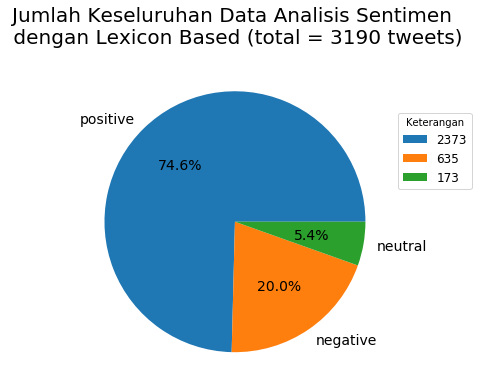

In [16]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in TWEET_DATA['polarity'].value_counts()]
labels = list(TWEET_DATA['polarity'].value_counts().index)
explode = (0, 0, 0)
mylabels = TWEET_DATA['polarity'].value_counts()

ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Jumlah Keseluruhan Data Analisis Sentimen \n dengan Lexicon Based (total = 3190 tweets)', fontsize = 20, pad = 15)
plt.legend(title="Keterangan",labels = mylabels, loc = (1, 0.60),fontsize = 12)
plt.show()

# E. Proses  Pembobotan Kata TF-IDF

## 1. Menghitung TF-IDF menggunakan Scikit-Learn

In [17]:
import pandas as pd 
import numpy as np

TWEET_PREP = pd.read_csv("lexicon/Hasil_Preprocessing_Pelabelan.csv", usecols=["Data_Preprocessing", "polarity"])
TWEET_PREP.columns = ["tweet", "kelas"]
pd.set_option('max_colwidth',1)

TWEET_PREP.head(10)

,tweet,kelas
0,"['selamat', 'pagi', 'minum', 'kopi', 'sengaja', 'manfaat', 'aplikasi', 'peduli', 'lindung']",positive
1,"['sosialisasi', 'aplikasi', 'peduli', 'lindung', 'satlantas', 'polres', 'pesisir', 'selatan', 'polda', 'metro']",positive
2,"['kemarin', 'daftar', 'orang', 'tua', 'vaksin', 'peduli', 'lindung', 'status', 'nya', 'langkah', 'gimana', 'ya']",positive
3,"['aplikasi', 'peduli', 'lindung', 'lindung']",positive
4,"['data', 'nomor', 'induk', 'duduk', 'temu', 'peduli', 'lindung', 'hubung', 'data', 'vaksinasi', 'pusat', 'telepon', 'hot', 'line', 'peduli', 'lindung']",positive
5,"['beranta', 'aplikasi', 'peduli', 'lindung']",positive
6,"['masuk', 'pakai', 'scan', 'barcode', 'aplikasi', 'peduli', 'lindung']",positive
7,"['inti', 'asn', 'aplikasi', 'peduli', 'lindung', 'minta', 'tri', 'sehat', 'qr', 'code', 'nya']",positive
8,"['kawan', 'mall', 'pakai', 'aplikasi', 'peduli', 'lindung']",positive
9,"['masuk', 'universitas', 'padjajaran', 'scan', 'peduli', 'lindung']",positive


In [18]:
# menggabungkan token menjadi list bentuk kalimat
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
TWEET_PREP["tweet_join"] = TWEET_PREP["tweet"].apply(join_text_list)

TWEET_PREP["tweet_join"].head(10)

0    selamat pagi minum kopi sengaja manfaat aplikasi peduli lindung                                       
1    sosialisasi aplikasi peduli lindung satlantas polres pesisir selatan polda metro                      
2    kemarin daftar orang tua vaksin peduli lindung status nya langkah gimana ya                           
3    aplikasi peduli lindung lindung                                                                       
4    data nomor induk duduk temu peduli lindung hubung data vaksinasi pusat telepon hot line peduli lindung
5    beranta aplikasi peduli lindung                                                                       
6    masuk pakai scan barcode aplikasi peduli lindung                                                      
7    inti asn aplikasi peduli lindung minta tri sehat qr code nya                                          
8    kawan mall pakai aplikasi peduli lindung                                                              
9    masuk universitas padja

In [19]:
X_join = TWEET_PREP["tweet_join"]
#contoh untuk mengetahui jumlah term dari 1 dokumen
komen_tf = X_join[0],
print(komen_tf)

('selamat pagi minum kopi sengaja manfaat aplikasi peduli lindung',)


In [20]:
cv = CountVectorizer()
term_fit = cv.fit(X_join)

term_frequency = term_fit.transform(komen_tf) #hanya menampilkan hasil document 1
#kolom 1 = dokumen ke-
#kolom 2 = term ke-
#kolom 3 = jumlah term dalam 1 dokumen
print ("Jumlah Kemunculan Kata")
print (term_frequency)

Jumlah Kemunculan Kata
  (0, 106)	1
  (0, 991)	1
  (0, 1086)	1
  (0, 1153)	1
  (0, 1234)	1
  (0, 1381)	1
  (0, 1444)	1
  (0, 1767)	1
  (0, 1784)	1


` Ouput diatas merupakan jumlah kemunculan kata dari 1 dokumen`
* kolom 1 = dokumen ke-
* kolom 2 = term ke-
* kolom 3 = jumlah term dalam 1 dokumen

In [21]:
max_features = 1000

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(TWEET_PREP["tweet_join"]).toarray()

terms = tf_idf.get_feature_names()

# sum tfidf frequency dari setiap dokumen
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
478,lindung,343.488951
647,peduli,343.353844
39,aplikasi,283.100411
972,vaksin,169.258269
619,pakai,155.849540
...,...,...
735,rancu,0.806488
865,sumber,0.790544
76,barat,0.786464
253,form,0.728654


* Data diatas merupakan Frekuensi Kata yang paling sering muncul dari setiap dokumen

### Mencari Nilai TF-IDF Menggunakan n-gram

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features)
    counts = cvect.fit_transform(TWEET_PREP["tweet_join"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
    tfs = tfidf.fit_transform(TWEET_PREP["tweet_join"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()
    
    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names()

# ngram_range (1, 1) to use unigram only
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

# ---------- check sparse data -------------------
idx_sample = 0

print("Show TFIDF sample ke-" + str(idx_sample), "\n")
print(TWEET_PREP["tweet"][idx_sample], "\n")

print("\t", "\tTerm", "\t", "TF", "\t", "IDF", "\t", "TF-IDF\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ('%20s' % item[3], "\t", 
               "%.3f" % item[0], "\t", 
               "%.3f" % item[1], "\t", 
               "%.3f" % item[2])

Show TFIDF sample ke-0 

['selamat', 'pagi', 'minum', 'kopi', 'sengaja', 'manfaat', 'aplikasi', 'peduli', 'lindung'] 

	 	Term 	 TF 	 IDF 	 TF-IDF

            aplikasi 	 0.143 	 1.573 	 0.225
             lindung 	 0.143 	 1.034 	 0.148
             manfaat 	 0.143 	 6.292 	 0.899
                pagi 	 0.143 	 5.481 	 0.783
              peduli 	 0.143 	 1.032 	 0.147
             selamat 	 0.143 	 5.153 	 0.736
             sengaja 	 0.143 	 7.456 	 1.065


# E. Klasifikasi Naive Bayes

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [24]:
data = pd.read_csv("lexicon/Hasil_Preprocessing_Pelabelan.csv", usecols=["Data_Preprocessing", "polarity"])
pd.set_option('max_colwidth',1)

print('Data Sentimen Aplikasi Peduli Lindungi :',data.shape)

Data Sentimen Aplikasi Peduli Lindungi : (3181, 2)


In [25]:
data['label_num'] = data.polarity.map({'positive':1,'negative':-1,'neutral':0})

#X merupakan Doc tweet dan Y merupakan Label/kelas sentimen prediksi 
X = TWEET_PREP["tweet_join"]
Y = data.label_num

df = pd.DataFrame(Y)

df.set_index(X)

,label_num
tweet_join,
selamat pagi minum kopi sengaja manfaat aplikasi peduli lindung,1
sosialisasi aplikasi peduli lindung satlantas polres pesisir selatan polda metro,1
kemarin daftar orang tua vaksin peduli lindung status nya langkah gimana ya,1
aplikasi peduli lindung lindung,1
data nomor induk duduk temu peduli lindung hubung data vaksinasi pusat telepon hot line peduli lindung,1
...,...
yuanita serta vaksinasi daftar elektronik vaksin sedia website isi biodata isi formulir vaksin,-1
yuk pakai peduli lindung,1
yuk unduh aplikasi peduli lindung tanggal september masuk supermarket wajib peduli lidungi,1


**Keterangan :**  `1 = Positive`  `0 = Neutral` `-1 = Negative`

In [26]:
#splitting the dataset into train and test data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)
print ('\n Jumlah Data Latih :', ytrain.shape)
print ('\n Jumlah Data Uji :', ytest.shape)


 Jumlah Data Latih : (2544,)

 Jumlah Data Uji : (637,)


* Code diatas bertujuan untuk membuat traning data set degan split data 80:20

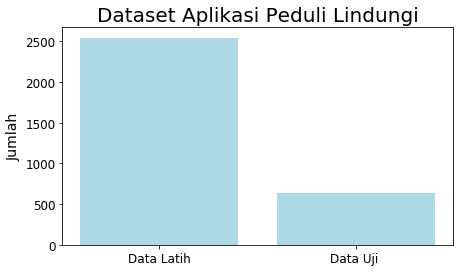

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,4))
plt.bar('Data Latih', ytrain.shape, color='lightblue')
plt.bar('Data Uji ', ytest.shape, color='lightblue')

plt.title('Dataset Aplikasi Peduli Lindungi', size=20)
plt.ylabel('Jumlah', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [28]:
print('Pembobotan Term Frequency', len(term_fit.vocabulary_))
print (term_fit.vocabulary_)

Pembobotan Term Frequency 2217


{'selamat': 1767, 'pagi': 1381, 'minum': 1234, 'kopi': 991, 'sengaja': 1784, 'manfaat': 1153, 'aplikasi': 106, 'peduli': 1444, 'lindung': 1086, 'sosialisasi': 1884, 'satlantas': 1736, 'polres': 1531, 'pesisir': 1495, 'selatan': 1770, 'polda': 1527, 'metro': 1221, 'kemarin': 911, 'daftar': 405, 'orang': 1372, 'tua': 2080, 'vaksin': 2151, 'status': 1898, 'nya': 1339, 'langkah': 1040, 'gimana': 603, 'ya': 2199, 'data': 421, 'nomor': 1327, 'induk': 736, 'duduk': 490, 'temu': 2000, 'hubung': 693, 'vaksinasi': 2152, 'pusat': 1595, 'telepon': 1990, 'hot': 690, 'line': 1090, 'beranta': 232, 'masuk': 1173, 'pakai': 1386, 'scan': 1743, 'barcode': 186, 'inti': 766, 'asn': 124, 'minta': 1233, 'tri': 2076, 'sehat': 1762, 'qr': 1604, 'code': 383, 'kawan': 889, 'mall': 1144, 'universitas': 2132, 'padjajaran': 1379, 'syarat': 1942, 'periksa': 1478, 'pasuk': 1429, 'september': 1798, 'supermarket': 1927, 'hypermart': 702, 'wajib': 2169, 'riwayat': 1682, 'jalan': 791, 'lihat': 1083, 'pribadi': 1555, 'tak

In [29]:
vectorizer = TfidfVectorizer (max_features=5000)
counts = vectorizer.fit_transform(X)

print ("Pembobotan Term Frequency-Inverse Document Frequency (TF-IDF) \n")
print(counts)

Pembobotan Term Frequency-Inverse Document Frequency (TF-IDF) 

  (0, 1086)	0.060418485924024795
  (0, 1444)	0.0603425431111892
  (0, 106)	0.09192387531029918
  (0, 1153)	0.36430688110767284
  (0, 1784)	0.4251871210646933
  (0, 991)	0.4894086688167545
  (0, 1234)	0.4894086688167545
  (0, 1381)	0.3188446269496371
  (0, 1767)	0.30008533335561166
  (1, 1221)	0.4253291586776284
  (1, 1527)	0.3901151654981909
  (1, 1770)	0.37877879176055806
  (1, 1495)	0.4253291586776284
  (1, 1531)	0.31370344129751065
  (1, 1736)	0.3901151654981909
  (1, 1884)	0.28290989174358305
  (1, 1086)	0.05250774132949289
  (1, 1444)	0.05244174190048999
  (1, 106)	0.07988805070135749
  (2, 2199)	0.19825214925718274
  (2, 603)	0.29830581604694417
  (2, 1040)	0.48477579743440286
  (2, 1339)	0.2430039860365835
  (2, 1898)	0.335062361187536
  (2, 2151)	0.1585536711524345
  :	:
  (3178, 1173)	0.19284820476959422
  (3178, 1086)	0.06763075381239995
  (3178, 1444)	0.13509149112736024
  (3178, 106)	0.10289700057049121
  (3179

` Ouput diatas merupakan hasil TF-IDF dari seluruh dokumen`
* Kolom 1 untuk Dokumen
* Kolom 2 Untuk Nilai Term
* Kolom 3 untuk Nilai TF-IDF

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 60)
xtrain_dtm = cv.fit_transform(xtrain)
xtest_dtm = cv.transform(xtest)

In [31]:
# Training Naive Bayes (NB) classifier on training data.
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)

#printing accuracy, Confusion matrix, Precision and Recall
acc = metrics.accuracy_score(ytest,predicted)*100
conf = metrics.confusion_matrix(ytest,predicted)
rec = metrics.classification_report(ytest,predicted)

print('\n Nilai akurasi klasifikasi Naive Bayes dengan Lexicon Based: ', "%.5s" % acc + "%")
print('\n Classification report is: \n', rec)


 Nilai akurasi klasifikasi Naive Bayes dengan Lexicon Based:  82.41%

 Classification report is: 
               precision    recall  f1-score   support

          -1       0.63      0.36      0.46       105
           0       0.00      0.00      0.00        28
           1       0.85      0.97      0.90       504

    accuracy                           0.82       637
   macro avg       0.49      0.44      0.45       637
weighted avg       0.77      0.82      0.79       637



In [119]:
print('\n Confusion matrix: \n', conf)


 Confusion matrix: 
 [[ 38   1  66]
 [  6   0  22]
 [ 16   1 487]]


In [120]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

print("Akurasi =",accuracy_score(predicted, ytest))
precision, recall, fscore, support = score(ytest, predicted, average='weighted')
print("Presisi =", precision)
print("Recall =", recall)
print("F-score =", fscore)

Akurasi = 0.8241758241758241
Presisi = 0.774515050167224
Recall = 0.8241758241758241
F-score = 0.7901384991283045


# Visualisasi Grafik Confusion Matrix

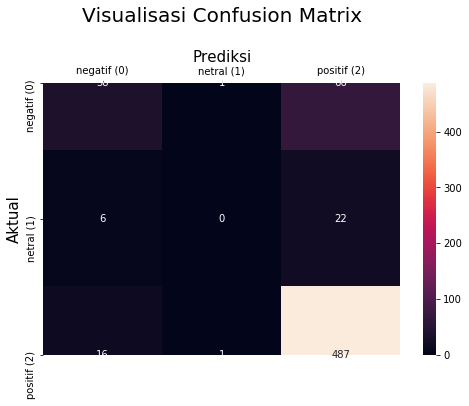

In [121]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ytest,predicted), annot=True, fmt=".0f", ax=ax)
plt.title('Visualisasi Confusion Matrix\n', size=20)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediksi', fontsize = 15)
ax.set_xticklabels(['negatif (0)', 'netral (1)', 'positif (2)'])
ax.set_ylabel('Aktual', fontsize = 15)
ax.set_yticklabels(['negatif (0)', 'netral (1)', 'positif (2)'])
plt.show()

# Penyimpanan Model

In [122]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [124]:
from sklearn.externals import joblib
joblib.dump(X,'lexicon/NBC_lexi.pkl')

['lexicon/NBC_lexi.pkl']